In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd
from IPython.display import Image

# Predicting NBA Games

By Vincent Lee

## Goal

My goal is to predict NBA Games based on past player averages and game results

## Dataset

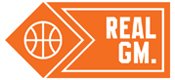

In [6]:
Image(filename='RealGM.png') 

I am using data from basketball.real.gm that is based off data from player performances over the past 5 years. In addition, I am also using data pulled off from kaggle that has data on game results over the past 5 years pulled off from NBA.com 

## Scraping/Cleaning the Data

Below tells you the approaches I took to get the final data

### Player Averages

For these variables, I scraped data from basketball.real.gm to get averages of players starting from the year 2014 all the way to the current season(2020). After scraping data, I used PCA to reduce the dimensions of each statistic into overall rebounding, offensive, and defensive scores. After performing PCA, for some categories I had two principal components so I took the approach of taking the average of both ratings after changing the scale using (NewValue = (((OldValue - OldMin) * (NewMax - NewMin)) / (OldMax - OldMin)) + NewMin)

Here is final product:

In [11]:
players = pd.read_pickle(os.path.join('Data', 'final_players.pkl'))
players.head()

,SeasonRank,Player,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,...,PPG,Year,OFFENSIVE_COMP1,OFFENSIVE_COMP2,REBOUNDING_COMP1,DEFENSIVE_COMP1,DEFENSIVE_COMP2,OFFENSE_RATING,DEFENSE_RATING,REBOUND_RATING
0,1,Kevin Durant,OKC,81,38.5,10.5,20.8,0.503,2.4,6.1,...,32.0,2014,7.896234,1.744766,2.104280,1.574915,0.733430,65.308313,35.459459,40.344263
1,2,Carmelo Anthony,NYK,77,38.7,9.6,21.3,0.452,2.2,5.4,...,27.4,2014,6.377504,1.022202,2.965697,1.340737,0.733430,57.559349,33.459459,48.197284
2,3,LeBron James,MIA,77,37.7,10.0,17.6,0.567,1.5,4.0,...,27.1,2014,5.901558,3.019249,2.011639,2.277450,-0.213712,65.673770,36.054054,39.499715
3,4,Kevin Love,MIN,77,36.3,8.4,18.5,0.457,2.5,6.6,...,26.1,2014,6.743401,0.091065,5.825045,0.404024,0.259859,54.185777,22.756757,74.264241
4,5,James Harden,HOU,73,38.0,7.5,16.5,0.456,2.4,6.6,...,25.4,2014,7.014809,0.755982,0.628386,2.277450,0.023073,58.111055,37.405405,26.889428


Taking a look at the golden state warrior's best players offensively, defensively, and rebounding-wise, we see that it's clear our dataset correctly identifys the top players offensively/defensively/ rebounding wise since most of the star players(starters) are in the top of the list if you sort it.

In [25]:
gsw_2019 = players[(players['Team'] == 'GSW') & (players['Year'] == 2019)]
gsw_2019.sort_values('OFFENSE_RATING', ascending = False).head()

,SeasonRank,Player,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,...,PPG,Year,OFFENSIVE_COMP1,OFFENSIVE_COMP2,REBOUNDING_COMP1,DEFENSIVE_COMP1,DEFENSIVE_COMP2,OFFENSE_RATING,DEFENSE_RATING,REBOUND_RATING
2484,9,Kevin Durant,GSW,78,34.6,9.2,17.7,0.521,1.8,5.0,...,26.0,2019,6.032409,1.846804,1.394337,0.169846,1.680572,60.486989,28.864865,33.872141
2481,6,Stephen Curry,GSW,69,33.8,9.2,19.4,0.472,5.1,11.7,...,27.3,2019,11.283529,-3.692065,0.957674,1.574915,0.023073,49.170701,31.405405,29.891354
2541,66,DeMarcus Cousins,GSW,30,25.7,5.9,12.4,0.480,0.9,3.2,...,16.3,2019,2.566860,1.514932,2.826534,1.574915,2.627714,49.049144,46.270270,46.928621
2725,250,Draymond Green,GSW,66,31.3,2.8,6.4,0.445,0.7,2.5,...,7.4,2019,1.292474,1.430287,2.126279,1.809094,1.680572,45.020412,42.864865,40.544820
2495,20,Klay Thompson,GSW,78,34.0,8.4,18.0,0.467,3.1,7.7,...,21.5,2019,6.631917,-1.937212,0.037928,1.106559,0.496644,44.251230,30.108108,21.506577


In [26]:
gsw_2019.sort_values('DEFENSE_RATING', ascending = False).head()

,SeasonRank,Player,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,...,PPG,Year,OFFENSIVE_COMP1,OFFENSIVE_COMP2,REBOUNDING_COMP1,DEFENSIVE_COMP1,DEFENSIVE_COMP2,OFFENSE_RATING,DEFENSE_RATING,REBOUND_RATING
2541,66,DeMarcus Cousins,GSW,30,25.7,5.9,12.4,0.480,0.9,3.2,...,16.3,2019,2.566860,1.514932,2.826534,1.574915,2.627714,49.049144,46.270270,46.928621
2725,250,Draymond Green,GSW,66,31.3,2.8,6.4,0.445,0.7,2.5,...,7.4,2019,1.292474,1.430287,2.126279,1.809094,1.680572,45.020412,42.864865,40.544820
2481,6,Stephen Curry,GSW,69,33.8,9.2,19.4,0.472,5.1,11.7,...,27.3,2019,11.283529,-3.692065,0.957674,1.574915,0.023073,49.170701,31.405405,29.891354
2495,20,Klay Thompson,GSW,78,34.0,8.4,18.0,0.467,3.1,7.7,...,21.5,2019,6.631917,-1.937212,0.037928,1.106559,0.496644,44.251230,30.108108,21.506577
2484,9,Kevin Durant,GSW,78,34.6,9.2,17.7,0.521,1.8,5.0,...,26.0,2019,6.032409,1.846804,1.394337,0.169846,1.680572,60.486989,28.864865,33.872141


In [28]:
gsw_2019.sort_values('REBOUND_RATING', ascending = False).head()

,SeasonRank,Player,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,...,PPG,Year,OFFENSIVE_COMP1,OFFENSIVE_COMP2,REBOUNDING_COMP1,DEFENSIVE_COMP1,DEFENSIVE_COMP2,OFFENSE_RATING,DEFENSE_RATING,REBOUND_RATING
2541,66,DeMarcus Cousins,GSW,30,25.7,5.9,12.4,0.480,0.9,3.2,...,16.3,2019,2.566860,1.514932,2.826534,1.574915,2.627714,49.049144,46.270270,46.928621
2725,250,Draymond Green,GSW,66,31.3,2.8,6.4,0.445,0.7,2.5,...,7.4,2019,1.292474,1.430287,2.126279,1.809094,1.680572,45.020412,42.864865,40.544820
2778,303,Kevon Looney,GSW,80,18.5,2.7,4.3,0.625,0.0,0.1,...,6.2,2019,-2.033664,0.862469,1.533802,-0.064332,0.733430,32.860631,21.459459,35.143563
2484,9,Kevin Durant,GSW,78,34.6,9.2,17.7,0.521,1.8,5.0,...,26.0,2019,6.032409,1.846804,1.394337,0.169846,1.680572,60.486989,28.864865,33.872141
2481,6,Stephen Curry,GSW,69,33.8,9.2,19.4,0.472,5.1,11.7,...,27.3,2019,11.283529,-3.692065,0.957674,1.574915,0.023073,49.170701,31.405405,29.891354


### Games Data

For this part, I downloaded data from kaggle and joined from multiple datasets to create one overall dataset. To get overall ratings for teams, I decided to first loop over each of the lists of players and get ratings that I made for each player. After, I eliminated lower outleirs because they usually don't play in a game. Lastly I took the average of the player averages to get an overall team average.

In addition, I took the difference of the away and home ratings for each category to add as another feature in my model.

Here is the final product:

In [32]:
games = pd.read_pickle(os.path.join('Data', 'final_games.pkl'))
games.head()

,HOME_TEAM_ABBREV,AWAY_TEAM_ABBREV,SEASON,HOME_RECORD,ROAD_RECORD,HOME_TEAM_WINS,OFF_HOME_TEAM,DEF_HOME_TEAM,REB_HOME_TEAM,OFF_AWAY_TEAM,...,REB_AWAY_TEAM,OFF_HOME_RATING,DEF_HOME_RATING,REB_HOME_RATING,OFF_AWAY_RATING,DEF_AWAY_RATING,REB_AWAY_RATING,OFFENSE_DIFFERENCE,DEFENSE_DIFFERENCE,REBOUND_DIFFERENCE
0,CHA,MIL,2019,-10,20,0,"[31.006061923099047, 38.54431945273706, 32.704...","[22.10810810810811, 28.81081081081081, 22.2162...","[23.308831973407106, 31.182094864883947, 35.85...","[35.22876717660929, 65.69235449876932, 37.7094...",...,"[17.28106695654748, 58.916993867334874, 24.020...",33.477084,20.021622,26.029330,39.084703,26.043243,26.156013,-5.607619,-6.021622,-0.126683
1,MIN,DAL,2019,-15,11,0,"[31.63000087955722, 24.95066073256286, 31.9678...","[29.405405405405403, 5.351351351351353, 21.459...","[17.25898881532161, 13.456670998027207, 24.888...","[41.62244146926659, 29.710952103096684, 48.975...",...,"[22.37412606063427, 21.685969263523607, 38.388...",35.712786,20.486486,23.266696,36.429985,20.762162,21.562970,-0.717199,-0.275676,1.703727
2,LAC,PHI,2019,19,-13,1,"[44.03598551522123, 37.12656298881634, 28.6805...","[53.513513513513516, 14.702702702702705, 8.054...","[26.533392671106416, 30.47002411684483, 18.105...","[25.93974282213501, 42.6812218695769, 44.48622...",...,"[9.964396462598044, 30.33662390755899, 42.5476...",40.421789,25.940541,25.653422,34.188720,22.178378,21.569685,6.233069,3.762162,4.083737
3,DEN,TOR,2019,17,10,1,"[43.82752587784179, 32.27739138834381, 54.2482...","[28.108108108108105, 21.513513513513516, 34.81...","[29.068883152536877, 24.15430293073206, 63.988...","[27.52057045795501, 34.03891798056395, 45.9075...",...,"[14.924055357398997, 26.57847134410255, 40.123...",36.647265,22.421622,24.336735,33.382946,19.313514,19.538902,3.264319,3.108108,4.797833
4,SAC,DET,2019,-2,-13,1,"[45.720084398700706, 29.937134564603657, 36.76...","[14.702702702702705, 16.702702702702705, 15.40...","[34.7626909366028, 23.82034569793837, 23.35391...","[27.664451648755787, 32.20682601470979, 37.932...",...,"[10.074796140113614, 23.019953413609556, 41.90...",39.696424,22.264865,25.286163,30.492550,15.410811,17.782184,9.203875,6.854054,7.503980


## Exploring the Data

I will hand select some of the interesting graphs

### Offensive/ Defensive Difference

This part illustrated that statistical differences between teams doesn't 100 percent correlate that a team will beat the other team. There will be upsets and the scatterplot below demonstrated that perfectly. This made me realize that my model can not be perfect

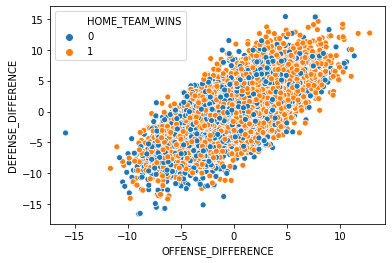

In [34]:
sns.scatterplot(games['OFFENSE_DIFFERENCE'], games['DEFENSE_DIFFERENCE'], hue = games['HOME_TEAM_WINS'])

This part illustrated that the Year of the season does not seem to affect home team wins that much; we only see a drastic drop during 2019 because the NBA Season was canceled due to COVID 19. Therfore, it seems that Year won't be a helpful predictor for winning.

Text(0.5, 1.0, 'Total Home Wins Per Season')

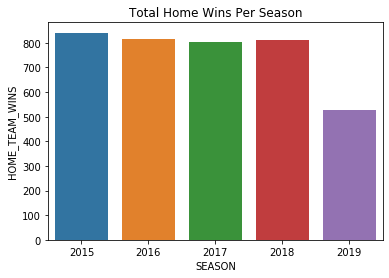

In [35]:
## wins per season
sns.barplot(games.SEASON,games.groupby('SEASON')['HOME_TEAM_WINS'].transform('sum'))
plt.title('Total Home Wins Per Season')

Out of all my created ratings, defense seems to have the most difference in statistics(though its appears little) meaning that a Home Team that won had a better defense than the away counterpart and vice versa when an away team won they had a better defense than home opponent

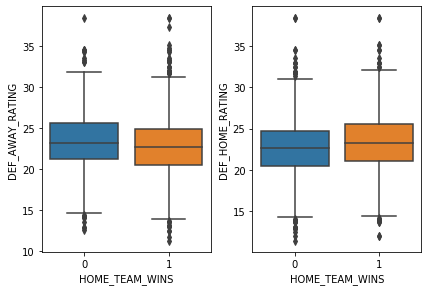

In [36]:
plt.subplots(1,2)
plt.tight_layout()

##making boxplots
plt.subplot(1,2,1)
sns.boxplot(games['HOME_TEAM_WINS'], games['DEF_AWAY_RATING'])
plt.subplot(1,2,2)
sns.boxplot(games['HOME_TEAM_WINS'], games['DEF_HOME_RATING'])

## Machine Learning

To save time I will only show the best possible model that I found. It turned out to be a Random Forest

In [38]:
X = games[['HOME_RECORD', 'ROAD_RECORD', 'OFF_HOME_RATING', 'DEF_HOME_RATING',
           'OFF_AWAY_RATING', 'DEF_AWAY_RATING','OFFENSE_DIFFERENCE', 
           'DEFENSE_DIFFERENCE']]
y = games['HOME_TEAM_WINS']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [85]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(min_samples_leaf = 20, min_samples_split = 7)
model.fit(X_train, y_train)
pred = model.predict(X_test)
model.score(X_test,y_test)

/Users/vincentlee/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7361026267562615

As you can see, the best model that I could find could only predict with 73% accuracy. This is probably due to a lot of upsets.

Also looking at the confusion matrix, it seems that our model diagnoses a win falsely quite often, which tells me that it probably is due to upsets( a bad team beats a good team)

In [91]:
from sklearn import metrics
tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()
tn, fp, fn, tp

(400, 251, 181, 805)

Take for example this game in the 2018 season where all stats and records pointed at okc winning, but the result was that Dallas won.

In [97]:
games.loc[1127]

HOME_TEAM_ABBREV                                                    OKC
AWAY_TEAM_ABBREV                                                    DAL
SEASON                                                             2018
HOME_RECORD                                                          10
ROAD_RECORD                                                         -23
HOME_TEAM_WINS                                                        0
OFF_HOME_TEAM         [52.766935964812895, 28.546015909147357, 42.68...
DEF_HOME_TEAM         [37.40540540540541, 21.513513513513516, 35.513...
REB_HOME_TEAM         [36.608188811220025, 15.07953370791071, 51.847...
OFF_AWAY_TEAM         [30.003538827562423, 38.33496882098179, 30.046...
DEF_AWAY_TEAM         [10.702702702702705, 21.45945945945946, 22.756...
REB_AWAY_TEAM         [15.746525782953679, 34.67253359061053, 24.732...
OFF_HOME_RATING                                                 42.8548
DEF_HOME_RATING                                                 

## Conclusion

Overall, the model fit wasn't as good as I hoped, but the model was not terrible. Some games were even hard to predict even if huma